In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [3]:
import plotly.express as px

In [4]:
%matplotlib widget

## Load data

In [5]:
subjects = [s.split(".")[0] for s in os.listdir(".") if s.startswith("S")]
subjects.sort()
subjects

['S10',
 'S11',
 'S13',
 'S14',
 'S15',
 'S16',
 'S17',
 'S2',
 'S3',
 'S4',
 'S5',
 'S6',
 'S7',
 'S8',
 'S9']

In [6]:
selected_subject = subjects[10]
selected_subject

'S5'

In [7]:
data = pd.read_csv(f"{selected_subject}.csv")

In [8]:
data.head()

,Unnamed: 0,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp,chest_ACC1,chest_ACC2,chest_ACC3,wrist_BVP,wrist_EDA,wrist_TEMP,wrist_ACC1,wrist_ACC2,wrist_ACC3,label,subject
0,0,-0.275803,0.016800,3.888321,34.119934,0.044250,0.8606,0.0742,0.8570,-7.25,0.547723,34.09,-16.0,-45.0,127.0,0,S5
1,1,-0.229752,0.014969,3.913116,34.142822,0.032043,0.8456,0.0780,0.8574,-7.25,0.547723,34.09,-16.0,-45.0,127.0,0,S5
2,2,-0.195282,0.015335,3.873062,34.135193,0.015259,0.8410,0.0874,0.7570,-7.25,0.547723,34.09,-16.0,-45.0,127.0,0,S5
3,3,-0.164474,-0.003708,3.883362,34.136750,-0.062561,0.8418,0.0986,0.5782,-7.25,0.547723,34.09,-16.0,-45.0,127.0,0,S5
4,4,-0.134811,0.017624,3.886795,34.118440,0.016785,0.8554,0.0984,0.3332,-7.25,0.547723,34.09,-16.0,-45.0,127.0,0,S5


## Models

In [9]:
data.columns

Index(['Unnamed: 0', 'chest_ECG', 'chest_EMG', 'chest_EDA', 'chest_Temp',
       'chest_Resp', 'chest_ACC1', 'chest_ACC2', 'chest_ACC3', 'wrist_BVP',
       'wrist_EDA', 'wrist_TEMP', 'wrist_ACC1', 'wrist_ACC2', 'wrist_ACC3',
       'label', 'subject'],
      dtype='object')

In [10]:
data_columns = [
    'chest_ECG', 'chest_EMG', 'chest_EDA', 'chest_Temp',
    'chest_Resp', 'chest_ACC1', 'chest_ACC2', 'chest_ACC3', 'wrist_BVP',
    'wrist_EDA', 'wrist_TEMP', 'wrist_ACC1', 'wrist_ACC2', 'wrist_ACC3'
]

In [11]:
target_column = "label"

In [11]:
# new_data = data[data["label"].isin((1, 2, 3, 4))]

In [12]:
# new_data = new_data.reset_index()

In [13]:
# new_data.drop(["index"], axis=1)

In [12]:
data.drop(data.loc[~data["label"].isin((1, 2, 3, 4))].index, inplace=True)

In [13]:
data["label"].unique

<bound method Series.unique of 195560     1
195561     1
195562     1
195563     1
195564     1
          ..
4112055    4
4112056    4
4112057    4
4112058    4
4112059    4
Name: label, Length: 2107700, dtype: int64>

In [14]:
data.reset_index(drop=True, inplace=True)

In [15]:
data

,Unnamed: 0,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp,chest_ACC1,chest_ACC2,chest_ACC3,wrist_BVP,wrist_EDA,wrist_TEMP,wrist_ACC1,wrist_ACC2,wrist_ACC3,label,subject
0,195560,-0.028976,-0.007828,6.387711,34.251160,2.789307,0.8408,-0.0390,-0.3862,25.52,1.363788,34.34,63.0,4.0,9.0,1,S5
1,195561,-0.029114,-0.003296,6.384277,34.252716,2.891541,0.8418,-0.0422,-0.3862,25.52,1.363788,34.34,63.0,4.0,9.0,1,S5
2,195562,-0.030212,-0.005264,6.398392,34.249634,2.861023,0.8386,-0.0390,-0.3906,25.52,1.363788,34.34,63.0,4.0,9.0,1,S5
3,195563,-0.030991,-0.003159,6.392288,34.298553,2.833557,0.8406,-0.0394,-0.3914,25.52,1.363788,34.34,63.0,4.0,9.0,1,S5
4,195564,-0.031906,-0.001968,6.385803,34.326050,2.857971,0.8424,-0.0434,-0.3914,25.52,1.363788,34.34,63.0,4.0,9.0,1,S5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107695,4112055,-0.132889,-0.005768,6.108475,34.826170,-3.486633,0.8318,-0.0254,-0.4156,-5.70,0.873854,30.41,61.0,4.0,17.0,4,S5
2107696,4112056,-0.133118,-0.002747,6.103134,34.830780,-3.498840,0.8318,-0.0252,-0.4134,-5.70,0.873854,30.41,61.0,4.0,17.0,4,S5
2107697,4112057,-0.132614,-0.006363,6.110001,34.826170,-3.504944,0.8330,-0.0242,-0.4114,-5.70,0.873854,30.41,61.0,4.0,17.0,4,S5
2107698,4112058,-0.131607,-0.007278,6.103897,34.850800,-3.480530,0.8334,-0.0238,-0.4130,-5.70,0.873854,30.41,61.0,4.0,17.0,4,S5


In [16]:
new_data = data.sample(10000)

In [17]:
X = new_data[data_columns]

In [18]:
y = new_data[target_column]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## KNN

In [20]:
all_metrics = {}

In [21]:
def classify_and_show(name, classifier, X_train, X_test, y_train, y_test):
    all_metrics[name] = {}
    classifier.fit(X_train, y_train)
    
    train_predicts = classifier.predict(X_train)
    train_acc = (sum(train_predicts == y_train)/len(y_train))*100
    all_metrics[name]["train_acc"] = train_acc
    print("\nTrain accuracy:", train_acc, "%\n")

    predicts = classifier.predict(X_test)
    test_acc = (sum(predicts == y_test)/len(y_test))*100
    all_metrics[name]["test_acc"] = test_acc
    print("\nTest accuracy:", test_acc, "%\n")
    
    print("\n\nPrecision")
    prec = metrics.precision_score(y_test, predicts, average="macro")
    all_metrics[name]["precision"] = prec
    print(prec)
    
    print("\n\nRecall")
    recall = metrics.recall_score(y_test, predicts, average="macro")
    all_metrics[name]["recall"] = recall
    print(recall)
    
    print("\n\nF1 Score")
    f1_score = metrics.f1_score(y_test, predicts, average="macro")
    all_metrics[name]["f1_score"] = f1_score
    print(f1_score)
    
    print("\n\nClassification Report")
    print(metrics.classification_report(y_test, predicts, target_names=["Baseline", "Stress", "Amusement", "Meditation"]))
    
    print("\n\nConfusion matrix")
    print(metrics.confusion_matrix(y_test, predicts, labels=[1, 2, 3, 4]))
    
    print("\n\nCohen Kappa score")
    # near 1 is better, 0 is bad
    cohen = metrics.cohen_kappa_score(y_test, predicts)
    all_metrics[name]["cohen"] = cohen
    print(cohen)
    
    print("\n\nMatthews Correlation Coefficient")
    # near 1 or -1 is better, 0 is bad
    matthews = metrics.matthews_corrcoef(y_test, predicts)
    all_metrics[name]["matthews"] = matthews
    print(matthews)
    
    return train_predicts, predicts

In [22]:
classifier = KNeighborsClassifier(n_neighbors=3)

In [23]:
classify_and_show("KNN", classifier, X_train, X_test, y_train, y_test)


Train accuracy: 98.58571428571429 %


Test accuracy: 97.53333333333333 %



Precision
0.9691493046015229


Recall
0.9770628103613919


F1 Score
0.9727073343279116


Classification Report
              precision    recall  f1-score   support

    Baseline       0.98      0.98      0.98      1192
      Stress       0.99      1.00      1.00       643
   Amusement       0.92      0.98      0.95       372
  Meditation       0.99      0.94      0.97       793

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000



Confusion matrix
[[1168    0   15    9]
 [   0  643    0    0]
 [   5    1  366    0]
 [  23    4   17  749]]


Cohen Kappa score
0.965358800128703


Matthews Correlation Coefficient
0.9655060697319015


(array([4, 2, 4, ..., 4, 1, 1]), array([3, 1, 4, ..., 1, 2, 1]))

In [24]:
classifier = SVC(kernel="linear")
classify_and_show("SVM Linear", classifier, X_train, X_test, y_train, y_test)


Train accuracy: 100.0 %


Test accuracy: 99.86666666666667 %



Precision
0.9987021436503751


Recall
0.9987389659520807


F1 Score
0.9987181163515159


Classification Report
              precision    recall  f1-score   support

    Baseline       1.00      1.00      1.00      1192
      Stress       1.00      1.00      1.00       643
   Amusement       1.00      1.00      1.00       372
  Meditation       1.00      0.99      1.00       793

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



Confusion matrix
[[1192    0    0    0]
 [   0  643    0    0]
 [   0    0  372    0]
 [   3    0    1  789]]


Cohen Kappa score
0.9981243194796612


Matthews Correlation Coefficient
0.9981263552500869


(array([4, 2, 4, ..., 4, 4, 1]), array([3, 1, 4, ..., 1, 2, 1]))

In [25]:
classifier = SVC()
classify_and_show("SVM RBF", classifier, X_train, X_test, y_train, y_test)


Train accuracy: 96.28571428571429 %


Test accuracy: 96.3 %



Precision
0.9619785865829487


Recall
0.9534937102093343


F1 Score
0.9574307112013536


Classification Report
              precision    recall  f1-score   support

    Baseline       0.95      0.99      0.97      1192
      Stress       0.99      1.00      0.99       643
   Amusement       0.94      0.90      0.92       372
  Meditation       0.97      0.93      0.95       793

    accuracy                           0.96      3000
   macro avg       0.96      0.95      0.96      3000
weighted avg       0.96      0.96      0.96      3000



Confusion matrix
[[1176    0   10    6]
 [   0  643    0    0]
 [  21    1  335   15]
 [  38    7   13  735]]


Cohen Kappa score
0.9477778371963881


Matthews Correlation Coefficient
0.9480428726671826


(array([4, 2, 4, ..., 4, 1, 1]), array([3, 1, 4, ..., 1, 2, 1]))

In [26]:
classifier = DecisionTreeClassifier(max_depth=5)
classify_and_show("DT", classifier, X_train, X_test, y_train, y_test)


Train accuracy: 99.72857142857143 %


Test accuracy: 99.83333333333333 %



Precision
0.9984335839598998


Recall
0.9966397849462365


F1 Score
0.997522855643509


Classification Report
              precision    recall  f1-score   support

    Baseline       1.00      1.00      1.00      1192
      Stress       1.00      1.00      1.00       643
   Amusement       1.00      0.99      0.99       372
  Meditation       0.99      1.00      1.00       793

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



Confusion matrix
[[1192    0    0    0]
 [   0  643    0    0]
 [   0    0  367    5]
 [   0    0    0  793]]


Cohen Kappa score
0.9976549122006945


Matthews Correlation Coefficient
0.9976588668458233


(array([4, 2, 4, ..., 4, 4, 1]), array([3, 1, 4, ..., 1, 2, 1]))

In [27]:
classifier = RandomForestClassifier(max_depth=5, n_estimators=10)
classify_and_show("Random Forest", classifier, X_train, X_test, y_train, y_test)


Train accuracy: 99.87142857142857 %


Test accuracy: 99.86666666666667 %



Precision
0.998745294855709


Recall
0.9982364508912462


F1 Score
0.9984873070943124


Classification Report
              precision    recall  f1-score   support

    Baseline       1.00      1.00      1.00      1192
      Stress       1.00      1.00      1.00       643
   Amusement       1.00      0.99      1.00       372
  Meditation       0.99      1.00      1.00       793

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



Confusion matrix
[[1190    0    0    2]
 [   0  643    0    0]
 [   0    0  370    2]
 [   0    0    0  793]]


Cohen Kappa score
0.9981245340639315


Matthews Correlation Coefficient
0.9981264060542346


(array([4, 2, 4, ..., 4, 4, 1]), array([3, 1, 4, ..., 1, 2, 1]))

In [28]:
classifier = MLPClassifier(alpha=1, max_iter=1000)
classify_and_show("MLP", classifier, X_train, X_test, y_train, y_test)


Train accuracy: 99.15714285714286 %


Test accuracy: 98.83333333333333 %



Precision
0.9862774871628218


Recall
0.9872322691487297


F1 Score
0.9867479817647028


Classification Report
              precision    recall  f1-score   support

    Baseline       0.99      0.99      0.99      1192
      Stress       1.00      1.00      1.00       643
   Amusement       0.98      0.98      0.98       372
  Meditation       0.98      0.98      0.98       793

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



Confusion matrix
[[1178    0    5    9]
 [   0  643    0    0]
 [   0    0  363    9]
 [   6    2    4  781]]


Cohen Kappa score
0.9835987370090282


Matthews Correlation Coefficient
0.9836068683854474


(array([4, 2, 4, ..., 4, 1, 1]), array([3, 1, 4, ..., 1, 2, 1]))

In [29]:
classifier = AdaBoostClassifier()
classify_and_show("AdaBoost", classifier, X_train, X_test, y_train, y_test)


Train accuracy: 86.75714285714285 %


Test accuracy: 87.0 %



Precision
0.66688969580194


Recall
0.7456971973729868


F1 Score
0.6985129782052468


Classification Report
              precision    recall  f1-score   support

    Baseline       1.00      0.99      0.99      1192
      Stress       1.00      1.00      1.00       643
   Amusement       0.00      0.00      0.00       372
  Meditation       0.67      0.99      0.80       793

    accuracy                           0.87      3000
   macro avg       0.67      0.75      0.70      3000
weighted avg       0.79      0.87      0.82      3000



Confusion matrix
[[1179    0    0   13]
 [   0  643    0    0]
 [   0    0    0  372]
 [   5    0    0  788]]


Cohen Kappa score
0.8126511400898698


Matthews Correlation Coefficient
0.8324525523975627


/home/sarnayakhome/envs/DL/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sarnayakhome/envs/DL/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([4, 2, 4, ..., 4, 4, 1]), array([4, 1, 4, ..., 1, 2, 1]))

## Compare classifiers

In [30]:
all_metrics

{'KNN': {'train_acc': 98.58571428571429,
  'test_acc': 97.53333333333333,
  'precision': 0.9691493046015229,
  'recall': 0.9770628103613919,
  'f1_score': 0.9727073343279116,
  'cohen': 0.965358800128703,
  'matthews': 0.9655060697319015},
 'SVM Linear': {'train_acc': 100.0,
  'test_acc': 99.86666666666667,
  'precision': 0.9987021436503751,
  'recall': 0.9987389659520807,
  'f1_score': 0.9987181163515159,
  'cohen': 0.9981243194796612,
  'matthews': 0.9981263552500869},
 'SVM RBF': {'train_acc': 96.28571428571429,
  'test_acc': 96.3,
  'precision': 0.9619785865829487,
  'recall': 0.9534937102093343,
  'f1_score': 0.9574307112013536,
  'cohen': 0.9477778371963881,
  'matthews': 0.9480428726671826},
 'DT': {'train_acc': 99.72857142857143,
  'test_acc': 99.83333333333333,
  'precision': 0.9984335839598998,
  'recall': 0.9966397849462365,
  'f1_score': 0.997522855643509,
  'cohen': 0.9976549122006945,
  'matthews': 0.9976588668458233},
 'Random Forest': {'train_acc': 99.87142857142857,
  

In [31]:
models = list(all_metrics.keys())

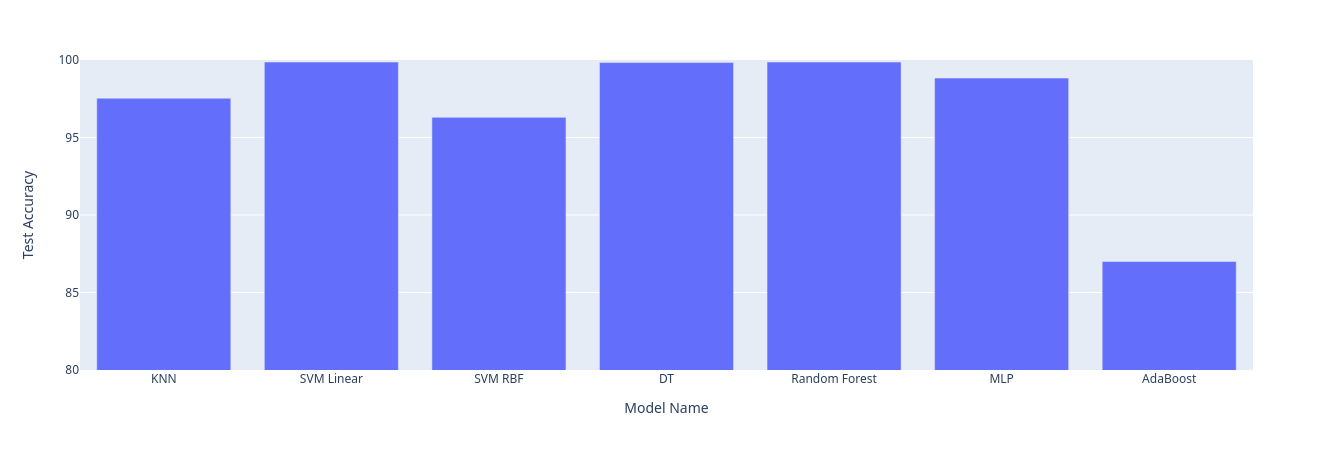

In [34]:
fig = px.bar(x=models,
             y=[all_metrics[model]["test_acc"] for model in models],
             labels={
                 "x": "Model Name",
                 "y": "Test Accuracy"
             })
fig.update_yaxes(range=[80, 100])
fig.show()

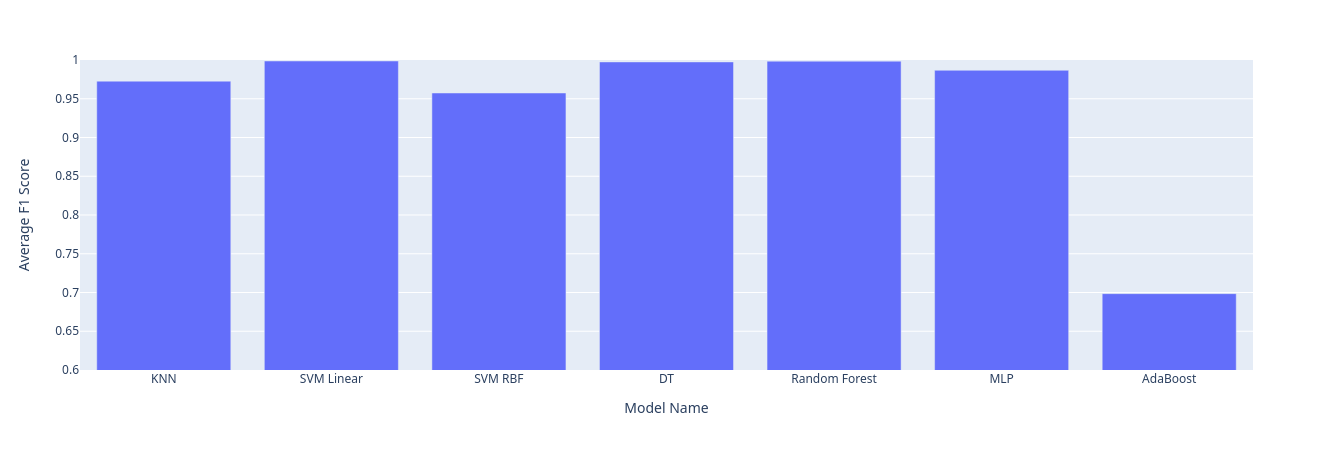

In [39]:
fig = px.bar(x=models,
             y=[all_metrics[model]["f1_score"] for model in models],
             labels={
                 "x": "Model Name",
                 "y": "Average F1 Score"
             })
fig.update_yaxes(range=[0.6, 1])
fig.show()

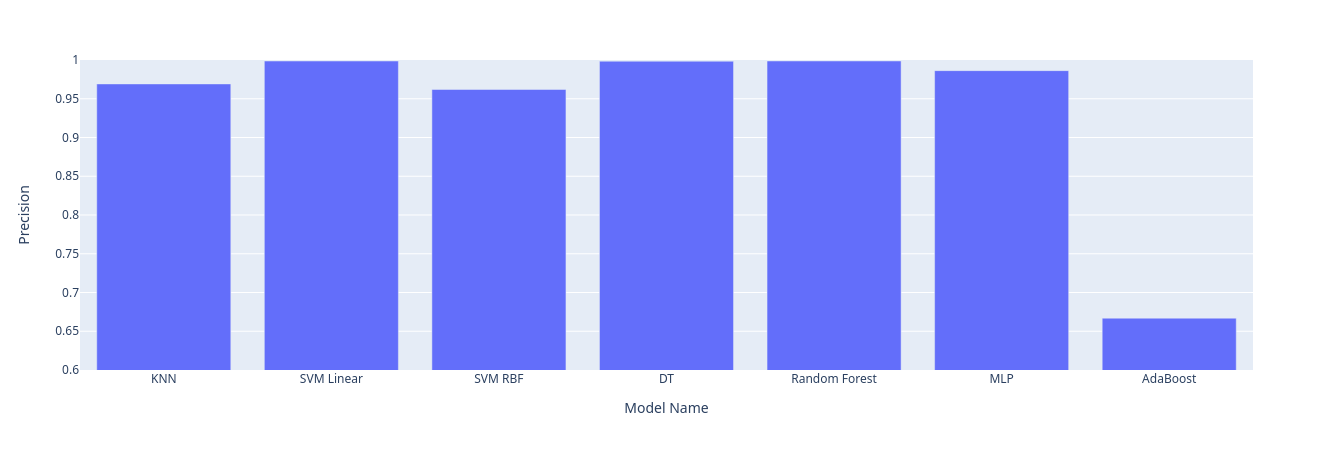

In [40]:
fig = px.bar(x=models,
             y=[all_metrics[model]["precision"] for model in models],
             labels={
                 "x": "Model Name",
                 "y": "Precision"
             })
fig.update_yaxes(range=[0.6, 1])
fig.show()

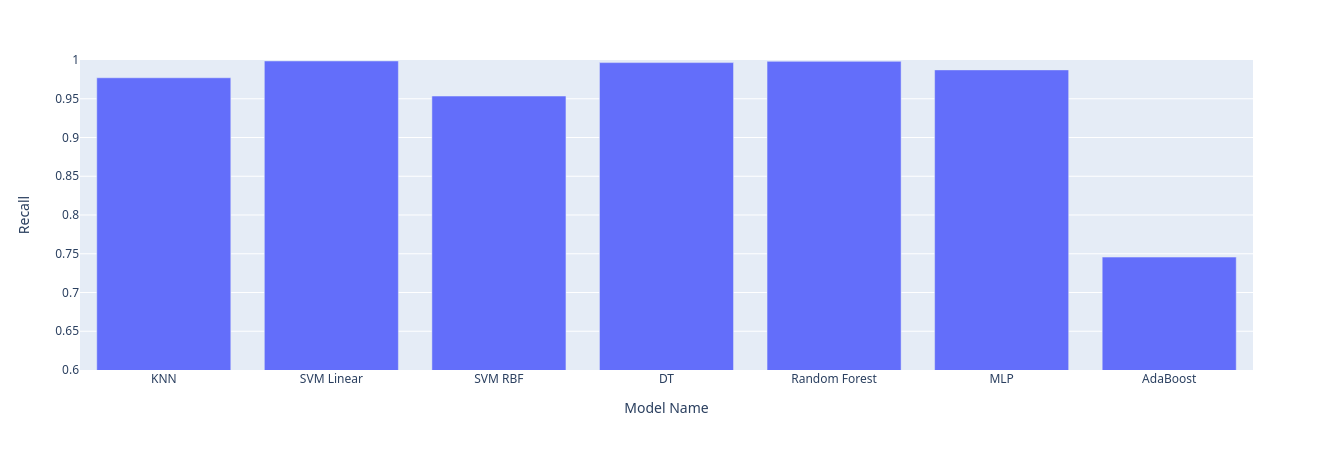

In [41]:
fig = px.bar(x=models,
             y=[all_metrics[model]["recall"] for model in models],
             labels={
                 "x": "Model Name",
                 "y": "Recall"
             })
fig.update_yaxes(range=[0.6, 1])
fig.show()